In [1]:
import numpy as np
import pandas as pd
import os
import ROOT as r
import uproot
import uproot_methods
import pickle
import sys
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import glob
#from mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Welcome to JupyROOT 6.20/06


### Compare root and uproot methods to verify correctness in current approach

In [2]:
year = 2018
norm_cut = 100000
max_bins = None
title = None
lumi_json = None
plot = "Segments/hSTimeCombined"
dname = plot.split('/')[0]
hname = plot.split('/')[1]
hpath = "DQMData/Run {}/CSC/Run summary/CSCOfflineMonitor"

In [3]:
#For 2018
fnames = []
fnamesD =glob.glob("/eos/cms/store/group/comm_dqm/DQMGUI_data/Run2018/SingleMuon/*/DQM_V0001_R000*__SingleMuon__Run2018D-PromptReco-v2__DQMIO.root")
fnamesABC = glob.glob("/eos/cms/store/group/comm_dqm/DQMGUI_data/Run2018/SingleMuon/*/DQM_V0001_R000*__SingleMuon__Run2018*-17Sep2018-*__DQMIO.root")
fnames= fnamesD +fnamesABC

In [4]:
#HistogramIntegral returns the total number of events
def HistogramIntegral(hist):
    return sum(hist[0][i] for i in range(len(hist[0])))

In [5]:
runs = []
hists = []
hstr = "DQMData/Run {{}}/CSC/Run summary/CSCOfflineMonitor/{0}/{1}".format(dname, hname)
#Extend the lists runs and hists for all filepaths that we found in the previous cell
for fname in fnames:
    run = int(fname.split("/")[-1].split("__")[0][-6:])
    #Corrupted file
    if run == 315267:
        continue
    #if len(runs)==10:
        #break
    fin = r.TFile(fname)
    h = fin.Get(hstr.format(run))
    #if norm_cut is None or h.Integral() >= norm_cut:
    if norm_cut is None or True:
        nbins = h.GetNbinsX() if max_bins==None else min(h.GetNbinsX(), max_bins)
        hists.append([h.GetBinContent(i) for i in range(1, nbins+1)])
        runs.append(run)

    if title is None:
        title = h.GetTitle()

    fin.Close()

In [6]:
runs_u = []
hists_u = []
#Extend the lists runs and hists for all filepaths that we found in the previous cell
for fname in fnames:
    run = int(fname.split("/")[-1].split("__")[0][-6:])
    #Corrupted file
    if run == 315267:
        continue
    #if len(runs_u)==10:
        #break
    f = uproot.open(fname)
    #Fetch all the 1D histograms into a list
    histograms =f[hpath.format(run)].allitems(filterclass=lambda cls: issubclass(cls, uproot_methods.classes.TH1.Methods))
    for name, roothist in histograms:
        name = name.decode("utf-8")
        name = name.replace(";1", "")
        #Grab the 1D histogram we want
        if plot == name: 
            h = roothist.numpy()
            #Include only histograms that have enough events
            if norm_cut is None or HistogramIntegral(h) >= norm_cut:
                if max_bins==None:
                    nbins_u = len(h[0])
                else:
                    nbins_u = min(len(h[0]), max_bins)
                hists_u.append(h[0])
                runs_u.append(run)

In [7]:
print(runs)
print(runs_u)

[320500, 320569, 320570, 320571, 320612, 320617, 320654, 320673, 320674, 320688, 320712, 320757, 320804, 320807, 320809, 320821, 320822, 320823, 320824, 320838, 320840, 320841, 320853, 320854, 320855, 320856, 320857, 320858, 320859, 320887, 320888, 320916, 320917, 320920, 320933, 320934, 320936, 320941, 320980, 320994, 320995, 320996, 321004, 321005, 321006, 321007, 321009, 321010, 321011, 321012, 321051, 321055, 321067, 321068, 321069, 321078, 321119, 321121, 321122, 321123, 321124, 321126, 321134, 321138, 321140, 321149, 321162, 321164, 321165, 321166, 321167, 321177, 321178, 321218, 321219, 321221, 321230, 321231, 321232, 321233, 321261, 321262, 321283, 321294, 321295, 321296, 321305, 321310, 321311, 321312, 321313, 321323, 321383, 321386, 321388, 321393, 321396, 321397, 321414, 321415, 321431, 321432, 321433, 321434, 321436, 321457, 321461, 321475, 321586, 321607, 321665, 321674, 321683, 321709, 321710, 321712, 321728, 321729, 321730, 321731, 321732, 321735, 321755, 321758, 321759,

In [8]:
hists
hists_u

[array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 2.000000e+00, 6.000000e+00,
        3.000000e+00, 8.000000e+00, 2.100000e+01, 4.500000e+01,
        1.200000e+02, 1.910000e+02, 2.430000e+02, 2.520000e+02,
        2.400000e+02, 2.160000e+02, 2.780000e+02, 4.510000e+02,
        6.230000e+02, 7.790000e+02, 6.580000e+02, 5.510000e+02,
        5.230000e+02, 7.550000e+02, 1.005000e+03, 1.275000e+03,
        1.121000e+03, 9.740000e+02, 9.850000e+02, 1.358000e+03,
        2.236000e+03, 2.962000e+03, 3.089000e+03, 2.545000e+03,
        2.023000e+03, 2.059000e+03, 2.807000e+03, 3.855000e+03,
        4.888000e+03, 6.711000e+03, 1.250500e+04, 2.826700e+04,
        5.830800e+04, 9.738800e+04, 1.20

The format looks right for both lists. Let's try a specific run.

In [9]:
print(runs[7])
print(runs_u[0])

320673
320673


In [10]:
hists[7]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 2.0,
 6.0,
 3.0,
 8.0,
 21.0,
 45.0,
 120.0,
 191.0,
 243.0,
 252.0,
 240.0,
 216.0,
 278.0,
 451.0,
 623.0,
 779.0,
 658.0,
 551.0,
 523.0,
 755.0,
 1005.0,
 1275.0,
 1121.0,
 974.0,
 985.0,
 1358.0,
 2236.0,
 2962.0,
 3089.0,
 2545.0,
 2023.0,
 2059.0,
 2807.0,
 3855.0,
 4888.0,
 6711.0,
 12505.0,
 28267.0,
 58308.0,
 97388.0,
 120211.0,
 108856.0,
 78707.0,
 48781.0,
 30070.0,
 20406.0,
 16339.0,
 15200.0,
 18793.0,
 34833.0,
 76058.0,
 145138.0,
 207563.0,
 208850.0,
 155167.0,
 94374.0,
 52988.0,
 32019.0,
 23011.0,
 19476.0,
 19800.0,
 28687.0,
 59311.0,
 122367.0,
 203714.0,
 246061.0,
 210053.0,
 138838.0,
 80987.0,
 46693.0,
 31808.0,
 26693.0,
 27019.0,
 41559.0,
 107937.0,
 313602.0,
 698416.0,
 1024032.0,
 956899.0,
 608440.0,
 304874.0,
 136210.0,
 64882.0,
 39012.0,
 29264.0,
 26053.0,
 31756.0,
 57302.0,
 112802.0,
 180367.0,
 209270.0,
 17

In [11]:
hists_u[0]

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 1.000000e+00, 2.000000e+00, 6.000000e+00,
       3.000000e+00, 8.000000e+00, 2.100000e+01, 4.500000e+01,
       1.200000e+02, 1.910000e+02, 2.430000e+02, 2.520000e+02,
       2.400000e+02, 2.160000e+02, 2.780000e+02, 4.510000e+02,
       6.230000e+02, 7.790000e+02, 6.580000e+02, 5.510000e+02,
       5.230000e+02, 7.550000e+02, 1.005000e+03, 1.275000e+03,
       1.121000e+03, 9.740000e+02, 9.850000e+02, 1.358000e+03,
       2.236000e+03, 2.962000e+03, 3.089000e+03, 2.545000e+03,
       2.023000e+03, 2.059000e+03, 2.807000e+03, 3.855000e+03,
       4.888000e+03, 6.711000e+03, 1.250500e+04, 2.826700e+04,
       5.830800e+04, 9.738800e+04, 1.202110e+05, 1.0885

In [12]:
print(nbins)
print(nbins_u)

200
200


In [13]:
#Make rows even length if jagged
lens = [len(row) for row in hists]
maxlen = np.amax(lens)
if maxlen != np.amin(lens):
    for i in range(len(hists)):
        hists[i] = np.ndarray.tolist(hists[i])
hists = np.array(hists)

In [14]:
#Make rows even length if jagged
lens = [len(row) for row in hists_u]
maxlen = np.amax(lens)
if maxlen != np.amin(lens):
    for i in range(len(hists_u)):
        hists[i] = np.ndarray.tolist(hists_u[i])
hists = np.array(hists_u)

In [15]:
#Define extra infos such as run number, title, and luminosity
#To be updated: query lumi data from OMS
extra_info = {"runs":runs}
extra_info["title"]  = title
if lumi_json is not None:
    with open(lumi_json, 'rb') as fid:
        ri = json.load(fid)
    lumis = []
    for run in runs:
        if str(run) in ri:
            A = ri[str(run)]["Initial Lumi"]
            B = ri[str(run)]["Ending Lumi"]
            if A<0.1 or B<0.1:
                lumis.append(0)
            elif A==B:
                lumis.append(A)
            else:
                lumis.append((A-B)/np.log(A/B))
        else:
            lumis.append(0)
    extra_info["lumis"] = np.array(lumis)

In [16]:
class HistCollection(object):
    """Store a collection of cleaned histograms for use in ML algorithms."""

    def __init__(self, hdata, normalize=True, remove_identical_bins=True, extra_info=None, 
                 hist_cleaner=None):
        """
        Initialize the HistCollection.
        
        hdata is a 2D array of histogram data
          Each row is a histogram and each column a bin
        normalize: whether or not to scale histograms to unit area
        remove_identical_bins: remove bins that are the same in every histogram in the collection
        extra_info: dict containing any auxiliary info you want to be stored
          (e.g. extra_info["runs"] could be a list of runs corresponding to each histogram)

        The histograms will be "cleaned" using the HistCleaner class
        """

        self.hdata = np.array(hdata, dtype=float)
        self.__nhists = self.hdata.shape[0]
        self.__nbins = self.hdata.shape[1]
        self.norms = np.sum(hdata, axis=1)

        if hist_cleaner is not None:
            self.__hist_cleaner = hist_cleaner
        else:
            self.__hist_cleaner = HistCleaner(normalize, remove_identical_bins)
        self.__hist_cleaner.fit(self.hdata)
        self.hdata = self.__hist_cleaner.transform(self.hdata)
        

        self.shape = self.hdata.shape
        self.extra_info = extra_info
        
    
    @property
    def nhists(self):
        return self.__nhists

    @property
    def nbins(self):
        return self.__nbins

    @property
    def hist_cleaner(self):
        return self.__hist_cleaner

    @staticmethod
    def draw(h, ax=None, text=None, **kwargs):
        """
        Plot a single histogram with matplotlib.
          - ax: the matplotlib axis to use. Defaults to plt.gca()
          - text: string to write on the plot
          - kwargs: keywork args to pass to pyplot.hist
        """

        if not ax:
            ax = plt.gca()

        if "histtype" not in kwargs:
            kwargs["histtype"] = 'stepfilled'
        if "color" not in kwargs:
            kwargs["color"] = 'k'
        if "linewidth" not in kwargs and "lw" not in kwargs:
            kwargs["lw"] = 1
        if "facecolor" not in kwargs and "fc" not in kwargs:
            kwargs["fc" ] = "lightskyblue"
        if "linestyle" not in kwargs and "ls" not in kwargs:
            kwargs["linestyle"] = '-'

        nbins = h.size
        ax.hist(np.arange(nbins)+0.5, weights=h, bins=np.arange(nbins+1),
                **kwargs)
        ax.set_ylim(0, np.amax(h)*1.5)
        if np.amax(h) > 10000/1.5:
            ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
        if text:
            ax.text(0.05, 0.9, text, transform=ax.transAxes)
        
    def draw_single(self, idx, restore_bad_bins=True, use_normed=False, draw_title=True, **kwargs):
        """
        Plot the histogram at index idx with matplotlib.
          - ax: the matplotlib axis to use. Defaults to plt.gca()
          - restore_bad_bins: use the HistCleaner to restore bins that were removed for plotting
          - use_normed: whether to draw normalized histograms
          - draw_title: whether to draw the title on the plot (extra_info["title"] must exist)
          - kwargs: arguments to pass to the draw function above
        """

        h = self.hdata[idx, :]
        if restore_bad_bins:
            h = self.__hist_cleaner.restore_bad_bins(h)
        if not use_normed:
            h = h*self.norms[idx]

        if draw_title and "title" in self.extra_info:
            kwargs["text"] = self.extra_info["title"]

        HistCollection.draw(h, **kwargs)

In [17]:
class HistCleaner(object):
    """ 
    sklearn-style preprocessing class to perform necessary "cleaning" of histogram collections for use in ML algorithms
    
    Can perform two separate operations, controlled by boolean flags:
     - normalize: whether or not to scale histograms to unit area
     - remove_identical_bins: remove bins that are the same in every histogram in the collection
    """
    def __init__(self, normalize=True, remove_identical_bins=True):
        self.__normalize = normalize
        self.__remove_identical_bins = remove_identical_bins

        # internal use
        self.__is_fit = False

    
    @property
    def normalize(self):
        return self.__normalize

    @normalize.setter
    def normalize(self, norm):
        if not isinstance(norm, bool):
            raise Exception("normalize must be set to a boolean value")
        self.__normalize = norm

    @property
    def remove_identical_bins(self):
        return self.__remove_identical_bins

    @remove_identical_bins.setter
    def remove_identical_bins(self, rib):
        if not isinstance(rib, bool):
            raise Exception("remove_identical_bins must be set to a boolean value")
        self.__remove_identical_bins = rib

    def fit(self, hd):
        self.nbins = hd.shape[1]
        # find the "good" bin indices (those that aren't the same in every histogram)
        #np.tile transform and repeat a given array
        bad_bins = np.all(hd==np.tile(hd[0,:],hd.shape[0]).reshape(hd.shape), axis=0)
        
        good_bins = np.logical_not(bad_bins)
        self.bad_bins = np.arange(self.nbins)[bad_bins]
        self.good_bins = np.arange(self.nbins)[good_bins]
        self.n_good_bins = self.good_bins.size
        self.bad_bin_contents = hd[0,self.bad_bins]

        self.__is_fit = True

    def _check_fit(self):
        if not self.__is_fit:
            raise Exception("Must fit the HistCleaner before calling transform")

    def restore_bad_bins(self, hd):
        self._check_fit()
        init_shape = hd.shape
        if len(init_shape) == 1:
            hd = hd.reshape(1,-1)
        if hd.shape[1] != self.n_good_bins:
            raise Exception("Invalid number of columns")

        ret = np.zeros((hd.shape[0], self.nbins))
        ret[:,self.good_bins] = hd
        ret[:,self.bad_bins] = np.tile(self.bad_bin_contents, hd.shape[0]).reshape(hd.shape[0], self.bad_bins.size)

        if len(init_shape) == 1:
            ret = ret.reshape(ret.size,)
        return ret

    def remove_bad_bins(self, hd):
        self._check_fit() 
        init_shape = hd.shape
        if len(init_shape) == 1:
            hd = hd.reshape(1,-1)
        if hd.shape[1] != self.nbins:
            raise Exception("Invalid number of columns")
        
        ret = hd[:,self.good_bins]
        if len(init_shape) == 1:
            ret = ret.reshape(ret.size,)
        return ret

    def transform(self, hd):
        self._check_fit()
        init_shape = hd.shape
        if len(init_shape)==1:
            hd = hd.reshape(1,-1)
        is_cleaned = False
        if hd.shape[1] != self.nbins:
            if hd.shape[1] == self.n_good_bins:
                is_cleaned = True
            else:
                raise Exception("Invalid shape! Expected {0} or {1} columns, got {2}".format(self.nbins,self.n_good_bins, hd.shape[1]))

        # remove bad bins
        if not is_cleaned and self.remove_identical_bins:
            hd = self.remove_bad_bins(hd)

        # normalize each row
        if self.normalize:
            norms = np.sum(hd, axis=1)
            tile = np.tile(norms, self.n_good_bins).reshape(self.n_good_bins, -1).T
            hd = np.divide(hd, tile, out=np.zeros_like(hd), where=tile!=0)

        if len(init_shape) == 1:
            hd = hd.reshape(hd.size,)
        return hd

    def fit_transform(self, hd):
        self.fit(hd)
        return self.transform(hd)

In [18]:
hc = HistCollection(hists, extra_info=extra_info)

In [19]:
hc_u = HistCollection(hists_u, extra_info=extra_info)

In [20]:
hc

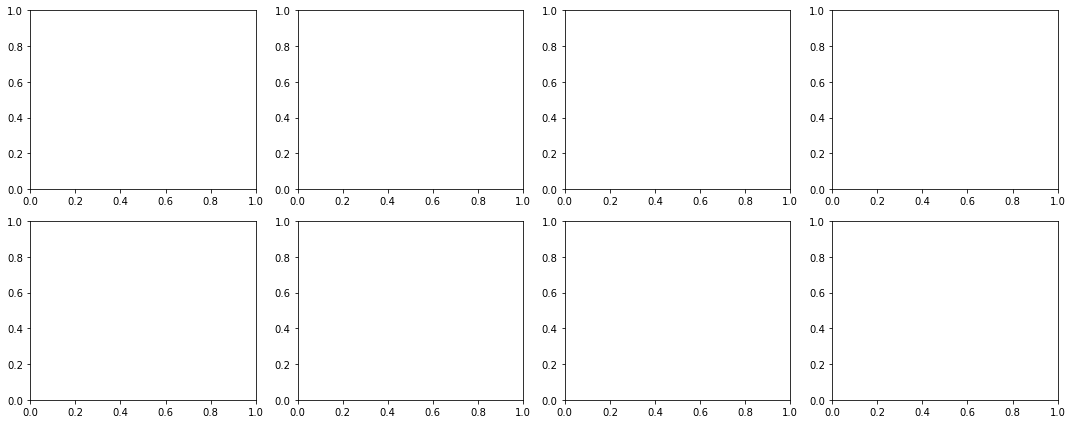

In [21]:
fig,axs = plt.subplots(2,4, figsize=(15,6))
fig.tight_layout()
axs = axs.flatten()
# runs = [299395,307055,301392,306647,
#         307073,304199,299614,299595]
#dname, hname = "Digis","hWireTBin_p11b"
# # dname, hname = "Segments", "hSTimeCombined"
# for i,run in enumerate(runs):
#     ax = axs[i]
#     idx = np.argmax(hc.extra_info["runs"] == run)
#     hc.draw_single(idx, ax=ax, fc='lightskyblue' if i!=6 else 'lightcoral')


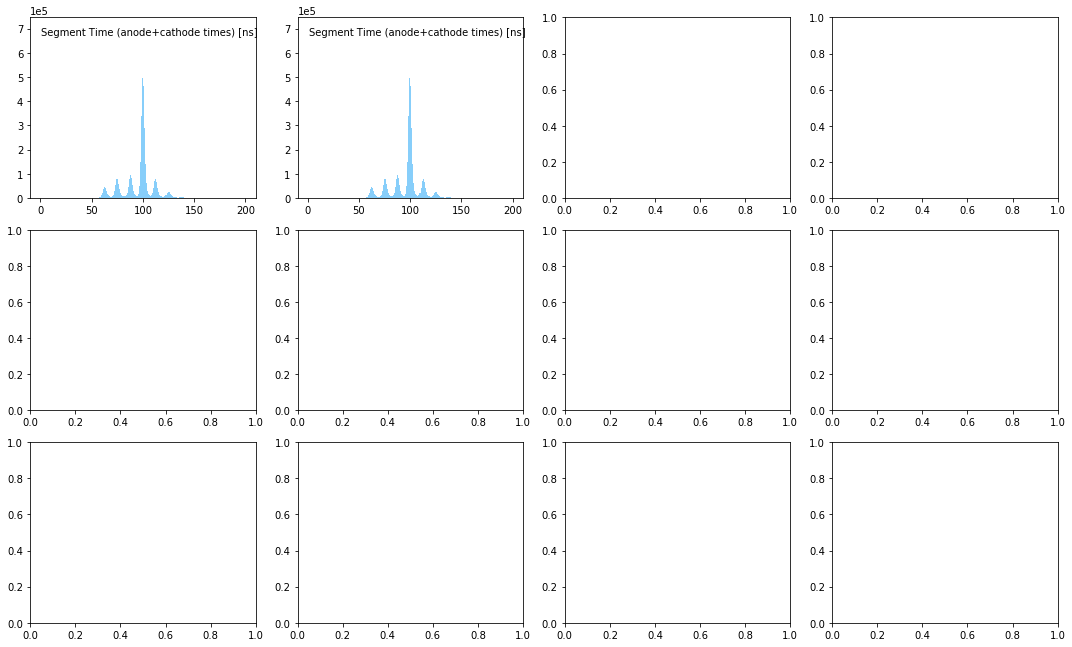

In [22]:
fig,axs = plt.subplots(3,4, figsize=(15,9))
fig.tight_layout()
axs = axs.flatten()
hist_names = [("Segments","hSTimeCombined")]
for i,(dname,hname) in enumerate(hist_names):
    ax = axs[i]
    #hc = utils.load_hist_data(dname, hname, pkl_dir="../csc/data/{year}", lumi_json="run_info.json")
    #idx = np.argmax(hc.extra_info["runs"] == run)
    hc.draw_single(1, ax=ax)
axs[0].ticklabel_format(style='sci',axis='y',scilimits=(0,0))
hc_u.draw_single(1, ax=axs[1])

Drawing works! Should spend some time learning matplotlib during this :)

In [23]:
#dname, hname = "Digis","hWireTBin_p11b"
#hc = utils.load_hist_data(dname, hname, pkl_dir="../csc/data/{year}", lumi_json="run_info.json")
print("Number of histograms:", hc.nhists)
print("Number of bins per histogram:", hc.nbins)
print( "Number of good bins:", hc.hist_cleaner.n_good_bins)
print ("\nFirst 5 raw histograms ({0} bins):".format(hc.nbins))
pd.DataFrame(hc.hist_cleaner.restore_bad_bins(hc.hdata)*hc.norms.reshape(-1,1), columns=["bin"+str(x) for x in range(hc.nbins)]).head(5)

Number of histograms: 509
Number of bins per histogram: 200
Number of good bins: 193

First 5 raw histograms (200 bins):


,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,...,bin190,bin191,bin192,bin193,bin194,bin195,bin196,bin197,bin198,bin199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
print("\nFirst 5 cleaned/normalized histograms ({0} bins):".format(hc.hist_cleaner.n_good_bins))
pd.DataFrame(hc.hdata, columns=["bin"+str(x) for x in range(hc.hist_cleaner.n_good_bins)]).head(5)



First 5 cleaned/normalized histograms (193 bins):


,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,...,bin183,bin184,bin185,bin186,bin187,bin188,bin189,bin190,bin191,bin192
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#dname, hname = "Digis","hWireTBin_p11b"
#hc = utils.load_hist_data(dname, hname, pkl_dir="../csc/data/{year}", lumi_json="run_info.json")
print("Number of histograms:", hc_u.nhists)
print("Number of bins per histogram:", hc_u.nbins)
print( "Number of good bins:", hc_u.hist_cleaner.n_good_bins)
print ("\nFirst 5 raw histograms ({0} bins):".format(hc_u.nbins))
pd.DataFrame(hc.hist_cleaner.restore_bad_bins(hc_u.hdata)*hc_u.norms.reshape(-1,1), columns=["bin"+str(x) for x in range(hc.nbins)]).head(5)

Number of histograms: 509
Number of bins per histogram: 200
Number of good bins: 193

First 5 raw histograms (200 bins):


,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,...,bin190,bin191,bin192,bin193,bin194,bin195,bin196,bin197,bin198,bin199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
print("\nFirst 5 cleaned/normalized histograms ({0} bins):".format(hc_u.hist_cleaner.n_good_bins))
pd.DataFrame(hc.hdata, columns=["bin"+str(x) for x in range(hc_u.hist_cleaner.n_good_bins)]).head(5)


First 5 cleaned/normalized histograms (193 bins):


,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,...,bin183,bin184,bin185,bin186,bin187,bin188,bin189,bin190,bin191,bin192
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
class DQMPCA(object):
    """Class to perform PCA specifically on HistCollection objects"""

    def __init__(self, use_standard_scaler=False, norm_cut=norm_cut, sse_ncomps=None):
        """Initialize the DQMPCA

        -use_standard_scalar determines whether to use standard scaling
          (zero mean, unit stdev) before feeding into a PCA. This helps
          for some histograms, but hurts for others
        """
        if use_standard_scaler:
            self.pca = Pipeline(
                ("scaler", StandardScaler()),
                ("pca", PCA())
                )
        else:
            self.pca = PCA()

        self.use_standard_scaler = use_standard_scaler
        self.norm_cut = norm_cut
        self.sse_ncomps = sse_ncomps

        self.__is_fit = False

    @property
    def sse_ncomps(self):
        return self.__sse_ncomps

    @sse_ncomps.setter
    def sse_ncomps(self, sse):
        if sse is not None and not isinstance(sse, tuple) and not isinstance(sse, list):
            raise Exception("illigal sse_ncomps value. Should be None or a list/tuple of ints")
        self.__sse_ncomps = sse

    def _check_fit(self):
        if not self.__is_fit:
            raise Exception("Must fit the DQMPCA before calling transform")

    def fit(self, hdata):
        if isinstance(hdata, HistCollection):
            self._hist_cleaner = hdata.hist_cleaner
            cleaned = hdata.hdata
            norms = hdata.norms
            
        else:
            self._hist_cleaner = HistCleaner()
            self._hist_cleaner.fit(hdata)
            cleaned = self._hist_cleaner.transform(hdata)
            norms = np.sum(cleaned, axis=1)

        cleaned = cleaned[norms>self.norm_cut, :]
        self.pca.fit(cleaned)        
        self.__is_fit = True

        if self.sse_ncomps is not None:
            self.sse_cuts = {}
            for ncomp in self.sse_ncomps:
                self.sse_cuts[ncomp] = []
                sses = self.sse(cleaned, ncomp)
                for pct in np.arange(1,101):
                    self.sse_cuts[ncomp].append(np.percentile(sses, pct))
    
    def transform(self, hdata):
        """Transform a set of histograms with the trained PCA"""
        self._check_fit()
        if isinstance(hdata, HistCollection):
            cleaned = hdata.hdata
        else:
            cleaned = self._hist_cleaner.transform(hdata)        
        return self.pca.transform(cleaned)
        
    def inverse_transform(self, xf, n_components=3, restore_bad_bins=False):
        self._check_fit()
        xf = np.array(xf)
        trunc = np.zeros((xf.shape[0], self._hist_cleaner.n_good_bins))
        trunc[:,:n_components] = xf[:,:n_components]
        ixf = self.pca.inverse_transform(trunc)
        if not restore_bad_bins:
            return ixf
        else:
            return self._hist_cleaner.restore_bad_bins(ixf)

    def sse(self, hdata, n_components=3):
        if isinstance(hdata, HistCollection):
            cleaned = hdata.hdata
        else:
            cleaned = self._hist_cleaner.transform(hdata)        
        xf = self.transform(cleaned)
        ixf = self.inverse_transform(xf, n_components=n_components)
        return np.sqrt(np.sum((ixf-cleaned)**2, axis=1))
        
    def score(self, hdata, n_components=3):
        if not hasattr(self, "sse_cuts") or n_components not in self.sse_cuts:
            raise Exception("must fit first with {0} in sse_ncomps".format(n_components))
        sse = self.sse(hdata, n_components)
        return np.interp(sse, self.sse_cuts[n_components], np.arange(1,101))

    @property
    def explained_variance_ratio(self):
        if self.use_standard_scaler:
            return self.pca.named_steps["pca"].explained_variance_ratio_
        else:
            return self.pca.explained_variance_ratio_

    @property
    def mean(self):
        if self.use_standard_scaler:
            return self.pca.named_steps["scaler"].inverse_transform(self.pca.named_steps["pca"].mean_)
        else:
            return self.pca.mean_

In [28]:
pca = DQMPCA(norm_cut=10000, sse_ncomps=(1,2,3))
pca.fit(hc_u)
xf = pca.transform(hc_u)

In [37]:
pca_2 = DQMPCA(norm_cut=10000, sse_ncomps=(1,2,3))
pca_2.fit(hc)
xf_2 = pca_2.transform(hc)

It seems like not enough events causes training to break. This makes mathematical sense since PCA requires finding eigenvalues and a matrix with less than full rank may cause trouble.

In [36]:
sample = hc.hdata[0]

In [48]:
transformed = pca_2.transform(sample.reshape(1, -1))

In [49]:
transformed

array([[ 1.15830821e-02,  4.57422258e-04, -5.50749635e-03,
        -3.60168427e-03,  6.49288529e-04,  2.92944452e-03,
        -9.26416098e-04,  8.24676924e-04, -3.77717476e-04,
         4.82832959e-04,  4.29927245e-04, -1.95568813e-04,
        -1.76548874e-04, -4.19305877e-04,  1.48058779e-04,
         1.11102596e-04,  6.97963724e-05, -1.19770105e-05,
        -1.49787389e-04,  3.00898079e-06, -8.59100997e-05,
         3.48161742e-05, -8.11919810e-05,  5.16668298e-05,
        -5.88318631e-05,  3.93436734e-05, -7.07927483e-05,
         1.78792839e-04,  8.27182370e-06, -1.37728229e-04,
         2.82526211e-05,  1.42741284e-04,  6.48994079e-05,
         2.60891310e-05,  1.45131016e-04,  4.01272118e-06,
         2.63452547e-05,  6.71620208e-06, -3.73344589e-05,
        -5.35000903e-06, -2.49639011e-05, -9.66840124e-07,
        -6.13002535e-05, -1.50567263e-05,  3.19467411e-06,
        -5.46110665e-05, -2.38187768e-05, -9.51647921e-06,
        -3.75317366e-05, -3.22257490e-05,  1.54085579e-0

In [50]:
pairs = [(1,2),(3,4),(3,2),(1,0)]

In [56]:
pairs = [[1,2],[3,4],[3,2],[1,0]]

In [57]:
pairs.sort(key=lambda x: x[0], reverse=False)

In [58]:
pairs

[[1, 2], [1, 0], [3, 4], [3, 2]]

In [59]:
def PCATest(np_data, pca_obj, n_components):

    # Transform data in terms of principle component vectors
    transf = pca_obj.transform(np_data.reshape(1,-1))
    # Zero out components beyond n_components cap
    transf[0,n_components:] *= 0
    # Reconstruct data using N components
    reco_data = pca_obj.inverse_transform(transf)
    reco_data = reco_data.flatten()
    # Get sum of squared errors
    sse = np.sqrt(np.sum((reco_data - np_data)**2))

    return sse, reco_data

In [60]:
sample = hc.hdata[0]

In [62]:
sse, reco_data = PCATest(sample, pca, 3)

In [63]:
sse

0.004953670992369234

In [64]:
reco_data

array([ 1.81398284e-10,  3.94220540e-10,  2.91927038e-10,  1.86687699e-10,
       -2.53564737e-09,  4.85652283e-10,  1.63227658e-10,  5.71748653e-10,
        1.33454971e-09,  3.97259386e-09,  1.18399992e-09,  8.40626926e-09,
       -3.42486778e-08, -3.00458201e-08,  2.51471404e-08,  6.31287482e-08,
        9.12837831e-08,  1.74837890e-07,  3.79355352e-07,  7.10459897e-07,
        1.09453345e-06,  1.95949615e-06,  4.40682373e-06,  1.13719824e-05,
        2.50381702e-05,  4.63386133e-05,  6.20363247e-05,  6.38964226e-05,
        5.49994596e-05,  5.17637454e-05,  6.84547647e-05,  1.06351208e-04,
        1.50455406e-04,  1.62593130e-04,  1.38920107e-04,  1.15266429e-04,
        1.16593987e-04,  1.58466627e-04,  2.20832140e-04,  2.59614833e-04,
        2.42315850e-04,  1.96634873e-04,  1.87609370e-04,  2.67233176e-04,
        4.21367317e-04,  5.51529260e-04,  5.55155880e-04,  4.46532361e-04,
        3.56977262e-04,  3.67484830e-04,  4.93269390e-04,  6.77467238e-04,
        8.19552013e-04,  

In [65]:
dir(pca)

['_DQMPCA__is_fit',
 '_DQMPCA__sse_ncomps',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_fit',
 '_hist_cleaner',
 'explained_variance_ratio',
 'fit',
 'inverse_transform',
 'mean',
 'norm_cut',
 'pca',
 'score',
 'sse',
 'sse_cuts',
 'sse_ncomps',
 'transform',
 'use_standard_scaler']

In [69]:
pca_2.__dict__

{'pca': PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False),
 'use_standard_scaler': False,
 'norm_cut': 10000,
 '_DQMPCA__sse_ncomps': (1, 2, 3),
 '_DQMPCA__is_fit': True,
 '_hist_cleaner': <__main__.HistCleaner at 0x7f42c914f310>,
 'sse_cuts': {1: [0.0009374541633562193,
   0.0011243658619212215,
   0.0012130477878569972,
   0.0013487535086366008,
   0.0014740207574287102,
   0.0015846054333291614,
   0.0016665937137646046,
   0.0017642283521230812,
   0.0019204051184864208,
   0.0019447593592152347,
   0.001986715907156136,
   0.0021396352994899987,
   0.002228777470488671,
   0.0022619711903968747,
   0.002297644913330627,
   0.0023599642946795225,
   0.0023817413972951652,
   0.0024327246908026623,
   0.002473834178817288,
   0.002512284002873684,
   0.002564733921030191,
   0.00263017142722782,
   0.002656840459952958,
   0.002704497410912849,
   0.0027421970320395178,
   0.0028011525034424755,
   0.0028585732

In [2]:
#Original pca.py code
def pca(histpair,
        sse_percentile=5, exp_var=0.95, norm_type='all', min_entries=100000,
        **kwargs):

    data_name = histpair.data_name
    data_hist = histpair.data_hist.Clone()
    jar_dir = histpair.config["jar_dir"]

    data_year = int(histpair.data_series[-4:])

    possible_pickles = glob.glob("/var/www/cgi-bin/pickle_jar/CSC/{2}/{0}/*_{1}.pkl".format(data_year,jar_dir, data_name))
    if len(possible_pickles) != 1:
        return None
    
    if data_hist.GetEntries() > 0:
        data_hist.Scale(1.0 / data_hist.Integral())

    # Reject empty histograms
    is_good = data_hist.GetEntries() != 0 and data_hist.GetEntries() >= min_entries
    np_data = get_np_data(data_hist)
    
    # Get 'good' (non-zero) bins
    np_data = np_data[pca_dict["good_bins"]]

    n_components = get_components(exp_var, pca_dict["pca"].explained_variance_ratio_)
    sse, reco_data = PCATest(np_data, pca_dict["pca"], n_components)

    # Get SSE cut
    sse_cut = pca_dict["sses_{}comp".format(n_components)]["{}pct".format(sse_percentile)]

    is_outlier = is_good and bool(sse > sse_cut)

    c, artifacts = draw_same(data_hist, reco_data, pca_dict["good_bins"], histpair.data_run, is_outlier)

    info = {
        'Data_Entries': data_hist.GetEntries(),
        'Sum of Squared Errors': round(sse, 3),
        'PCA Components': n_components
    }

    return PluginResults(
            c,
            show=bool(is_outlier),
            info=info,
            artifacts=artifacts)

In [ ]:
#Revised pca.py code
def pca(histpair,
        sse_percentile=5, exp_var=0.95, norm_type='all', min_entries=100000,
        **kwargs):

    data_name = histpair.data_name
    data_hist = histpair.data_hist.Clone()
    jar_dir = histpair.config["jar_dir"]

    data_year = int(histpair.data_series[-4:])

    possible_pickles = glob.glob("/var/www/cgi-bin/pickle_jar/CSC/{2}/{0}/*_{1}.pkl".format(data_year,jar_dir, data_name))
    if len(possible_pickles) != 1:
        return None
    
    pca_pickle = pickle.load(open(possible_pickles[0], "rb"))

    # Check that the hist is a histogram
    if not data_hist.InheritsFrom('TH1'):
        return None

    # Normalize data_hist
    if data_hist.GetEntries() > 0:
        data_hist.Scale(1.0 / data_hist.Integral())

    # Reject empty histograms
    is_good = data_hist.GetEntries() != 0 and data_hist.GetEntries() >= min_entries
    # Reject empty histograms
    is_good = data_hist.GetEntries() != 0 and data_hist.GetEntries() >= min_entries
    np_data = get_np_data(data_hist)
    
    # Get 'good' (non-zero) bins
    np_data = np_data[pca_pickle.__dict__['_hist_cleaner'].good_bins]

    n_components = pca_pickle.__dict__['_DQMPCA__sse_ncomps']
    sse, reco_data = PCATest(np_data, pca_pickle, n_components)

    
    # Get SSE cut
    sse_cut = pca_pickle.__dict__['sse_cuts'][n_components]

    is_outlier = is_good and bool(sse > sse_cut)

    c, artifacts = draw_same(data_hist, reco_data, pca_dict["good_bins"], histpair.data_run, is_outlier)

    info = {
        'Data_Entries': data_hist.GetEntries(),
        'Sum of Squared Errors': round(sse, 3),
        'PCA Components': n_components
    }

    return PluginResults(
            c,
            show=bool(is_outlier),
            info=info,
            artifacts=artifacts)